In [2]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../codes/")))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../codes/scpy2/")))

from scpy2.utils.nbmagics import install_magics
install_magics()
del install_magics

D:\Program_File\VSCode_Portable\workon_env\pyElan\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(
d:\09_Work\Jun_Workspace\Python_Scientific_Computing_Best_Practices\繁中程式碼\codes\scpy2\utils\program_finder.py:25: UserWarning: Inkscape not found
  warnings.warn("Inkscape not found")


In [3]:
import numpy as np
%matplotlib_svg
import pylab as pl

### 多項式函數

多項式函數是變數的整數次冪與係數的乘積之和，可以用下面的數學公式表示：

$f(x)=a_{n}x_{n}+a_{n-1}x_{n-1}+...+a_{2}x_{2}+a_{1}x+a_0$

由於多項式函數只包含加法和乘法運算，因此它很容易計算，可用於計算其他數學函數的近似值。多項式函數的應用非常廣泛，例如在嵌入式系統中經常會用它計算正弦、餘弦等函數。在 numpy 中，多項式函數的係數可以用一維陣列表示，例如可以用下面的陣列表示，其中 `a[0]` 是最高次的係數，`a[-1]` 是常數項，注意 $x^2$ 的係數為 0。

In [4]:
a = np.array([1.0, 0, -2, 1])

我們可以用 `poly1d()` 將係數轉為 `poly1d`(一元多項式)物件，此物件可以像函數一樣呼叫，它傳回多項式函數的值：

In [5]:
p = np.poly1d(a)
print(type(p))
p(np.linspace(0, 1, 5))     

<class 'numpy.poly1d'>


array([ 1.      ,  0.515625,  0.125   , -0.078125,  0.      ])

對 `poly1d` 物件進行加減乘除運算相當於對對應的多項式函數進行計算。例如：

In [6]:
p + [-2, 1] # 和 p + np.poly1d([-2, 1]) 相同

poly1d([ 1.,  0., -4.,  2.])

In [7]:
p * p # 兩個3次多項式相乘得到一個6次多項式

poly1d([ 1.,  0., -4.,  2.,  4., -4.,  1.])

In [8]:
p / [1, 1] # 除法傳回兩個多項式，分別為商式和余式

(poly1d([ 1., -1., -1.]), poly1d([2.]))

由於多項式的除法不一定能正好整除，因此它傳回除法所得到的商式和餘式。在上面的實例中，商式為  $x^2-x-1$ ，餘式為 2。因此將商式和被除式相乘，再加上餘式就等於原來的p：

In [9]:
p == np.poly1d([ 1., -1., -1.]) * [1,1] + 2 

True

多項式物件的 `deriv()` 和 `integ()` 方法分別計算多項式函數的微分和積分：

In [10]:
p.deriv()

poly1d([ 3.,  0., -2.])

In [11]:
p.integ()

poly1d([ 0.25,  0.  , -1.  ,  1.  ,  0.  ])

In [12]:
p.integ().deriv() == p

True

多項式函數的根可以使用 `roots()` 函數計算：

In [13]:
r = np.roots(p)
r

array([-1.61803399,  1.        ,  0.61803399])

In [14]:
p(r) # 將根帶入多項式計算，得到的值近似為0

array([2.33146835e-15, 4.44089210e-16, 1.11022302e-16])

而 `poly()` 函數可以將根轉換回多項式的係數：

In [15]:
np.poly(r)

array([ 1.00000000e+00, -7.77156117e-16, -2.00000000e+00,  1.00000000e+00])

除了使用多項式物件之外，也可以直接使用 numpy 提供的多項式函數對表示多項式係數的陣列進行運算。可以在 IPython 中使用自動補全檢視函數名稱：
```python
>>> np.poly # 按 Tab 鍵
np.poly     np.polyadd  np.polydiv  np.polyint  np.polysub
np.poly1d   np.polyder  np.polyfit  np.polymul  np.polyval
```
其中的 `polyfit()` 函數可以對一組資料使用多項式函數進行擬合，找到與這組資料的誤差平方和最小的多項式的係數。下面的程式用它計算 $-\pi/2 ~ \pi/2$ 區間與 $sin(x)$ 函數最接近的多項式的係數:

In [16]:
np.polymul([1,1],[1,1]) 

array([1, 2, 1])

In [17]:
np.set_printoptions(suppress=True, precision=4)

x = np.linspace(-np.pi / 2, np.pi / 2, 1000)  # ❶
y = np.sin(x)  # ❷

for deg in [3, 5, 7]:
    a = np.polyfit(x, y, deg)  # ❸
    error = np.abs(np.polyval(a, x) - y)  # ❹
    print("degree {}: {}".format(deg, a))
    print("max error of order %d:" % deg, np.max(error))

degree 3: [-0.145   0.      0.9887  0.    ]
max error of order 3: 0.008946993767080635
degree 5: [ 0.0076 -0.     -0.1658  0.      0.9998 -0.    ]
max error of order 5: 0.00015740861417157248
degree 7: [-0.0002 -0.      0.0083  0.     -0.1667 -0.      1.      0.    ]
max error of order 7: 1.526825579634128e-06


❶ 首先透過 `linspace()` 將 $-\pi/2 ~ \pi/2$ 區間等距為(1000-1)等份。  
❷ 計算擬合目標函數 $sin(x)$ 的值。  
❸ 將表示目標函數的陣列傳遞給 `polyfit()` 進行擬合，第三個參數 `deg` 為多項式函數的最高階數。`polyfit()` 所得到的多項式和目標函數在指定的 1000 個點之間的誤差最小，`polyfit()` 傳回多項式的係數陣列。  
❹ 使用 `polyval()` 計算多項式函數的值，並計算與目標函數的差的絕對值。  

從程式的輸出可以看到，由於正弦函數是一個奇函數，因此擬合的多項式係數中偶數次項的係數接近於 0。下圖顯示了各階多項式與正弦函數之間的誤差，請注意圖中 Y 軸為對數座標。

In [23]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

plt.rcParams["font.family"] = "Microsoft YaHei" # 可以直接修改設定字典，設定預設字型，這樣就不需要在每次繪製文字時設定字型了
plt.rcParams['axes.unicode_minus']=False    # 當座標軸上的 負號無法正常顯示時，需加這行 code

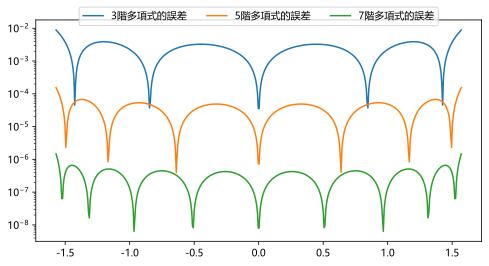

In [24]:
#%figonly=各階多項式近似正弦函數的誤差
pl.figure(figsize=(8, 4))

x = np.linspace(-np.pi / 2, np.pi / 2, 500)
y = np.sin(x)

for deg in [3, 5, 7]:
    a = np.polyfit(x, y, deg)
    error = np.abs(np.polyval(a, x) - y)
    pl.semilogy(x, error, label=u"{}階多項式的誤差".format(deg))
pl.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08),
          ncol=3, fancybox=True)
pl.axis('tight');

### 多項式函數類別

`np.polynomial` 模組中提供了更豐富的多項式函數類別，例如 `Polynomial`, `Chebyshev`, `Legendre` 等。它們和前面介紹的 `np.poly1d` 相反，多項式各項的係數按照冪從小到大的順序排列，下面使用 `Polynomial` 類別表示多項式 $x^3-2x+1$ ，並計算 $x=2$ 處的值：

In [1]:
from numpy.polynomial import Polynomial, Chebyshev
p = Polynomial([1, -2, 0, 1])
print(p(2.0))

5.0


`Polynomial` 物件提供了許多的方法對多項式操作，例如 `deriv()` 計算導函數：

In [4]:
p.deriv()

Polynomial([-2.,  0.,  3.], domain=[-1.,  1.], window=[-1.,  1.])

謝比雪夫多項式是一個正交多項式序列 $T_i(x)$ ，一個 n 次多項式可以表示為多個謝比雪夫多項式的加權和。在 numpy中，使用 `Chebyshev` 類別表示由謝比雪夫多項式組成的多項式 p(x)：

$p(x)=\sum_{i=0}^{n}c_iT_i(x)$

$T_i(x)$ 多項式可以透過 `Chebyshev.basis(i)` 獲得，圖 2-11 顯示了 0 到 4 次謝比雪夫多項式。透過多項式類別的 `convert()` 方法可以在不同類型的多項式之間相列轉換，轉換的目標類型由 `kind` 參數指定。例如下面將 $T_4(x)$ 轉換成 `Polynomial` 類別。由結果可知：

$T_4(x)=1-8x^2+8x^4$

In [5]:
Chebyshev.basis(4).convert(kind=Polynomial)

Polynomial([ 1.,  0., -8.,  0.,  8.], domain=[-1.,  1.], window=[-1.,  1.])

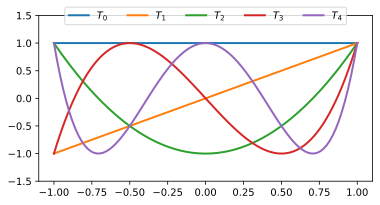

In [6]:
#%figonly=0到4次切比雪夫多項式
x = np.linspace(-1, 1, 100)
for i in range(5):
    ax = pl.plot(x, Chebyshev.basis(i)(x), lw=2, label="$T_%d$" % i)
pl.ylim(-1.5, 1.5)
pl.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08),
          ncol=5, fancybox=True);

謝比雪夫多項式的根被稱為謝比雪夫節點，可以用於多項式內插。對應的內插多項式能大幅地降低龍格現象，並且提供多項式在連續函數的最佳一致逼近。下面以 $f(x)=\frac{1}{1+25x^2}$ 函數內插為例示範謝比雪夫節點與龍格現象。

❶ 在 `[-1,1]` 區間上等距離取 n 個取樣點。  
❷ 使用 n 階謝比雪夫多項式的根作為取樣點。  
❸ 使用兩種取樣點分別對 $f(x)$ 進行多項式內插，即計算一個多項式經過所有的內插點。  

下圖顯示了兩種內插點所得到的內插多項式，由左圖可知等距離內插多項式在兩端有非常大的振盪，這種現象被稱為龍格現象，n 越大振盪也越大；而右圖採用謝比雪夫節點作為內插點，內插多項式的振盪明顯減小，並且 n 越大振盪小。

> `內插與擬合`
> 所謂多項式內插就是找到一個多項式經過所有的內插點。一個 n 階多項式有 n+1 個係數，因此可以透過解方程式求解經過 n+1 個內插點的 n 階多項式的係數。 `fit()` 方法雖然計算與目標點擬合的多項式係數，但是當使用 n 階多項式擬合 n+1 的目標點時，多項式將經過所有目標點，因此其結果與多項式內插相同。

In [7]:
def f(x):
    return 1.0 / ( 1 + 25 * x**2)

n = 11
x1 = np.linspace(-1, 1, n) #❶
x2 = Chebyshev.basis(n).roots() #❷
xd = np.linspace(-1, 1, 200)

c1 = Chebyshev.fit(x1, f(x1), n - 1, domain=[-1, 1]) #❸
c2 = Chebyshev.fit(x2, f(x2), n - 1, domain=[-1, 1])

print(u"插值多項式的最大誤差：",)
print(u"等距離取樣點：", abs(c1(xd) - f(xd)).max(),)
print(u"切比雪夫節點：", abs(c2(xd) - f(xd)).max())

插值多項式的最大誤差：
等距離取樣點： 1.9155693302903236
切比雪夫節點： 0.10914982501448123


In [9]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

plt.rcParams["font.family"] = "simsun" # 可以直接修改設定字典，設定預設字型，這樣就不需要在每次繪製文字時設定字型了
plt.rcParams['axes.unicode_minus']=False    # 當座標軸上的 負號無法正常顯示時，需加這行 code

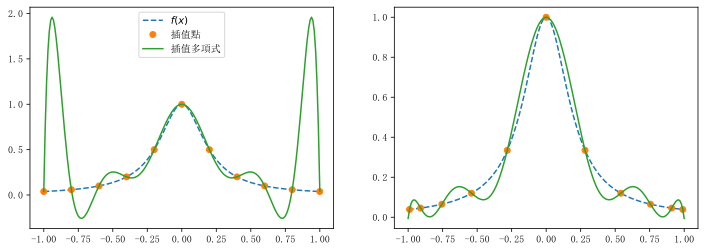

In [10]:
#%figonly=等距離插值點（左）、切比雪夫插值點（右）
fig, (ax1, ax2) = pl.subplots(1, 2, figsize=(12, 4))
ax1.plot(xd, f(xd), "--", label=u"$f(x)$")
ax1.plot(x1, f(x1), "o", label=u"插值點")
ax1.plot(xd, c1(xd), label=u"插值多項式")

ax1.legend(loc="upper center")

ax2.plot(xd, f(xd), "--")
ax2.plot(x2, f(x2), "o")
ax2.plot(xd, c2(xd));

在使用多項式逼近函數時，使用謝比雪夫多項式進行內插的誤差比一般多項式要小許多。在下面的實例中，對 g(x) 在 100 個謝比雪夫節點之上分別使用 `Polynomial` 和 `Chebyshev` 進行內插，結果如下圖所示。在使用 `Polynomial.fit()` 內插時，產生了 `RankWarning: The fit may be poorly conditioned` 警告，因此其結果多項式未能經過所有內插點。

In [11]:
def g(x):
    x = (x - 1) * 5
    return np.sin(x**2) + np.sin(x)**2

n = 100
x = Chebyshev.basis(n).roots()
xd = np.linspace(-1, 1, 1000)

p_g = Polynomial.fit(x, g(x), n - 1, domain=[-1, 1])
c_g = Chebyshev.fit(x, g(x), n - 1, domain=[-1, 1])

print("Max Polynomial Error:", abs(g(xd) - p_g(xd)).max())
print("Max Chebyshev Error:", abs(g(xd) - c_g(xd)).max())

Max Polynomial Error: 1.1953148215836547
Max Chebyshev Error: 6.475739056099883e-09


D:\Program_File\VSCode_Portable\workon_env\pyElan\lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


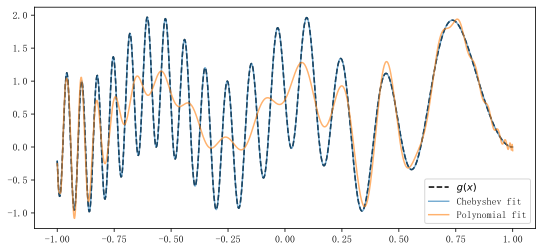

In [12]:
#%figonly=Chebyshev插值與Polynomial插值比較
pl.figure(figsize=(9, 4))
pl.plot(xd, g(xd), "k--", label="$g(x)$")
pl.plot(xd, c_g(xd), alpha=0.6, label=u"Chebyshev fit")
pl.plot(xd, p_g(xd), alpha=0.6, label=u"Polynomial fit")
pl.legend(loc="best");

`trim()` 方法可以降低多項式的次數，將尾部絕對值小於參數 `tol` 的高次係數截斷。下面使用 `trim()` 方法取得 c 中前 68 個係數，獲得一個新的 `Chebyshev` 物件 c_trimed，其最大誤差上升到 0.09 左右。

In [13]:
c_trimed = c_g.trim(tol=0.05)
print("degree:", c_trimed.degree())
print("error:", abs(g(xd) - c_trimed(xd)).max())

degree: 68
error: 0.09120948354583794


下面用同樣的方法對函數 h(x) 進行 19 階的謝比雪夫多項式內插，獲得內插多項式 c_h：

In [14]:
def h(x):
    x = 5 * x
    return np.exp(-x**2 / 10)

n = 20
x = Chebyshev.basis(n).roots()
c_h = Chebyshev.fit(x, h(x), n - 1, domain=[-1, 1])

print("Max Chebyshev Error:", abs(h(xd) - c_h(xd)).max())

Max Chebyshev Error: 1.6654422285711235e-09


多項式類別支援四則運算，下面將 c_g 和 c_h 相減獲得 c_diff，並且呼叫其 `roots()` 計算其所有根。然後找出其中所有的實數根 real_roots，它們就是 g(x) 與 h(x) 交點的水平座標。下圖顯示了這兩條函數曲線以及透過內插多項式計算的交點：

In [15]:
c_diff = c_g - c_h
roots = c_diff.roots()
real_roots = roots[roots.imag == 0].real
print(np.allclose(c_diff(real_roots), 0))

True


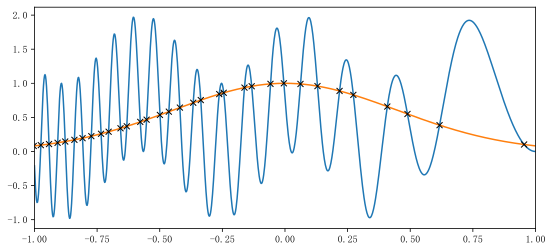

In [16]:
#%figonly=使用Chebyshev插值計算兩條曲線在[-1, 1]之間的所有交點
pl.figure(figsize=(9, 4))
pl.plot(xd, g(xd))
pl.plot(xd, h(xd))
pl.plot(real_roots, h(real_roots), "kx", markeredgewidth=1)
pl.xlim(-1, 1);

謝比雪夫多項式在區間`[-1,1]` 上為正交多項式，因此只有在該區間才能對目標函數正確內插。為了對任何區域的目標函數進行內插，需要對引數的區間進行縮放和平移轉換。可以透過 `domain` 參數指定擬合點的區間。在下面的實例中，對 g2(x) 在間 `[-10,0]` 之內使用謝比雪夫多項式進行內插。
❶ 為了產生目標區間的謝比雪夫節點，在透過 `basis()` 方法建立 $T_n(x)$ 時，透過 `domain` 參數指定目標區間。
❷ 在呼叫 `fit()` 方法進行擬合時，透過 `domain` 參數指定同樣的區間。
❸ 最後輸出擬合獲得的 c_g2 多項式在 `[-10,0]` 中與目標函數的最大誤差。

In [17]:
def g2(x):
    return np.sin(x**2) + np.sin(x)**2

n = 100
x = Chebyshev.basis(n, domain=[-10, 0]).roots() #❶
xd = np.linspace(-10, 0, 1000)

c_g2 = Chebyshev.fit(x, g2(x), n - 1, domain=[-10, 0]) #❷

print("Max Chebyshev Error:", abs(g2(xd) - c_g2(xd)).max()) #❸

Max Chebyshev Error: 6.47574660561645e-09
